In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup




In [2]:
URL = ["https://www.imdb.com/search/title/?genres=action&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e0da8c98-35e8-4ebd-8e86-e7d39c92730c&pf_rd_r=NCWR107JR3D070SM7GBG&pf_rd_s=center-2&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr2_i_2",
                "https://www.imdb.com/search/title/?genres=action&start=51&explore=title_type,genres&ref_=adv_nxt"]
  


In [27]:
# Creating the lists that we want to 
description =[]
duration=[]
release_date=[]
movie_director_stars=[]
movie_year=[]
director_sep = []
stars_sep = []
rating = []
genre=[]
Budget=[]
votes=[]


movie_name_100=[]

for url in range(0,2):
    req = requests.get(URL[url])
    soup = BeautifulSoup(req.text, 'html.parser')
    for container in soup.find_all("h3" ,class_="lister-item-header"):
        movie_name_100.append(container.text.replace('\n', '').strip(')').split('(')[0].split('.')[1])
        movie_year.append(container.text.replace('\n', '').strip(')').split('(')[1].split('–')[0]) 
    
    # for release in soup.find_all('span', class_="runtime"):
    #     duration.append(release.text) 

    
    for dist in soup.select('.text-muted+ .text-muted , .ratings-bar+ .text-muted'):
        description.append(dist.text.replace('\n', ''))

    for director in soup.find_all('p', class_ =''):
        director_sep.append(director.text.replace("\n", "").split('|')[0].split(':')[1].split(',')[0])
        stars_sep.append(director.text.replace("\n",'').split('Stars:')[1])

    # for years in soup.find_all('span', class_ ='lister-item-year'):
    #     movie_years.append(years.text)
    
    
    for elements in soup.select('.lister-item-content'):
        extract_rating=pd.Series(elements.text.replace('\n', '')).str.extract(r'(\d\.\d)Rate this')
        rating.append(float(extract_rating.squeeze()))
        dura=pd.Series(elements.text.replace('\n','')).str.extract(r'(\d+) min').squeeze()
        duration.append(float(dura))
        #Budget=pd.Series(elements.text.replace('\n', '')).str.extract(r'Gross:$\d\.\dM')
#Gross:$251.19M

    for genres in soup.find_all('span', class_ = 'genre'):
        genre.append(genres.text.replace('\n','').strip())

    for vote in soup.find_all('div', class_='lister-item-content'):
        extract_vote=pd.Series(vote.text.replace('\n','')).str.extract(r'Votes:(\d+,?\d+)').squeeze()
        
        if isinstance(extract_vote, str):
            votes.append(int(extract_vote.replace(',','')))
        else:
            votes.append(extract_vote)


In [28]:
df=pd.DataFrame({'Title':  movie_name_100, 'Description':description, 'Release':movie_year , 
                        'Director': director_sep, 
                        'Rating': rating, 'Duration':duration, 'Votes': votes,
                        'Genre':genre, 'Stars': stars_sep, })

df[:6]

,Title,Description,Release,Director,Rating,Duration,Votes,Genre,Stars
0,The Batman,"When the Riddler, a sadistic serial killer, be...",2022,Matt Reeves,8.4,176.0,256621.0,"Action, Crime, Drama","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,..."
1,Adam à travers le temps,"""After accidentally crash-landing in 2022, tim...",2022,Shawn Levy,6.8,106.0,76475.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J..."
2,The Last Kingdom,As Alfred the Great defends his kingdom from N...,2015,Alexander Dreymon,8.5,60.0,114557.0,"Action, Drama, History","Alexander Dreymon, Eliza Butterworth, Arnas Fe..."
3,Obi-Wan Kenobi,Jedi Master Obi-Wan Kenobi watches over young ...,2022,Rupert Friend,NaN,NaN,NaN,"Action, Adventure, Sci-Fi","Rupert Friend, Hayden Christensen, Ewan McGreg..."
4,Vikings: Valhalla,Follow-up series to 'Vikings' set 100 years af...,2022,Sam Corlett,7.1,51.0,23292.0,"Action, Adventure, Drama","Sam Corlett, Leo Suter, Jóhannes Haukur Jóhann..."
5,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021,Jon Watts,8.6,148.0,534776.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja..."


In [92]:
df['Rating'].mean()

7.436470588235293

<AxesSubplot:title={'center':'Number of movies released by years'}>

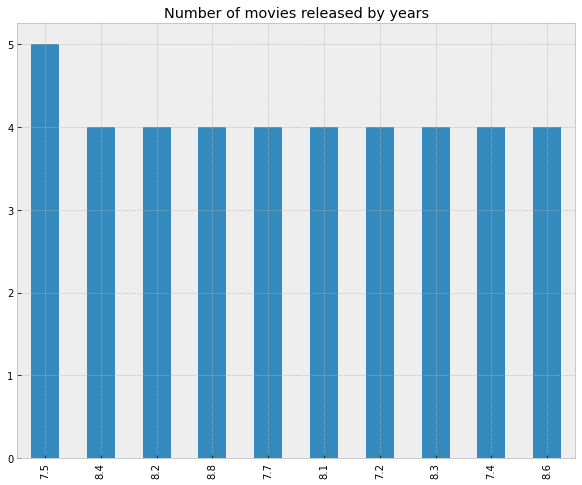

In [29]:
plt.style.use('bmh')
df["Rating"].value_counts().nlargest(10).plot(kind="bar", title="Number of movies released by years", figsize=(10,8))

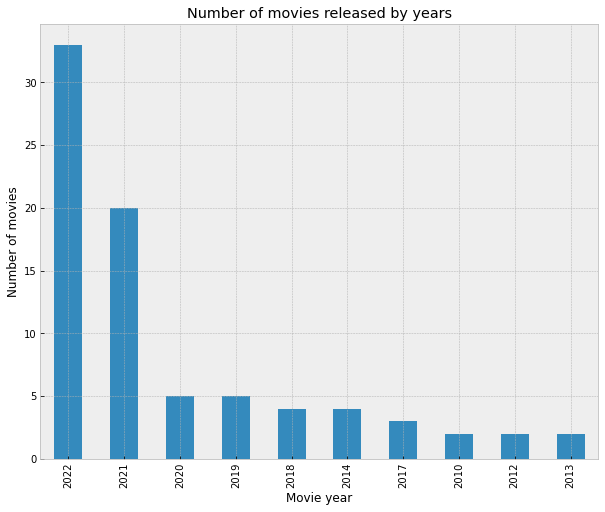

In [9]:
plt.style.use('bmh')
df["Release"].value_counts().nlargest(10).plot(kind="bar", title="Number of movies released by years", figsize=(10,8))
plt.ylabel('Number of movies')
plt.xlabel('Movie year')
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

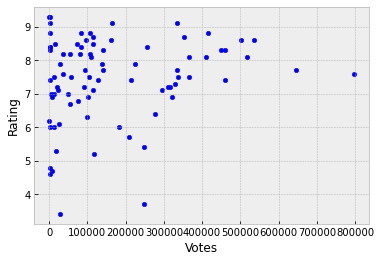

In [12]:
df.plot.scatter(x='Votes',y='Rating')

In [88]:
#   normalized_df=(df-df.mean())/df.std()

#   normalized_df=(df-df.min())/(df.max()-df.min())

df.describe()

,Rating,Duration,Votes
count,85.000000,86.000000,84.000000
mean,7.436471,85.767442,164758.595238
std,1.249366,48.685225,173797.345715
min,3.400000,14.000000,253.000000
25%,6.900000,43.000000,22477.500000
50%,7.600000,60.000000,104175.500000
75%,8.400000,125.750000,280619.250000
max,9.300000,242.000000,795818.000000


Text(0, 0.5, 'Number of movies')

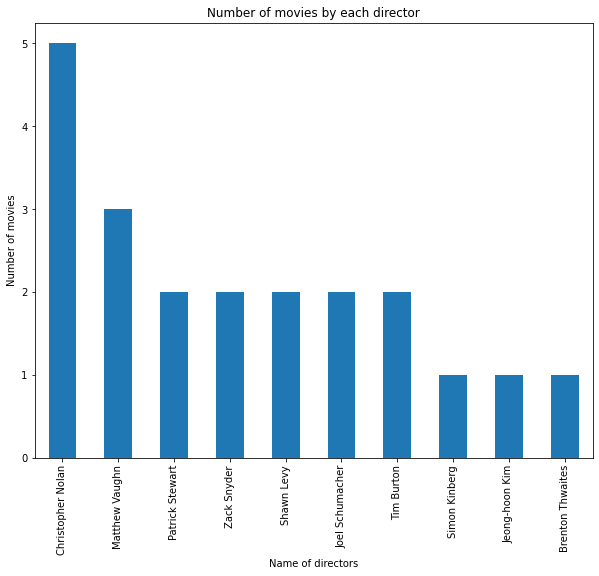

In [5]:
df["Director"].value_counts().nlargest(10).plot(kind="bar", title="Number of movies by each director", figsize=(10,8))

plt.xlabel("Name of directors")
plt.ylabel("Number of movies")